# Parkinson's Disease Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df = pd.read_csv('C:/Users/User/Downloads/parkinsons.csv')

In [3]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
df.shape

(195, 24)

In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

0 => Healthy

1 => Parkinson's

### Visualization

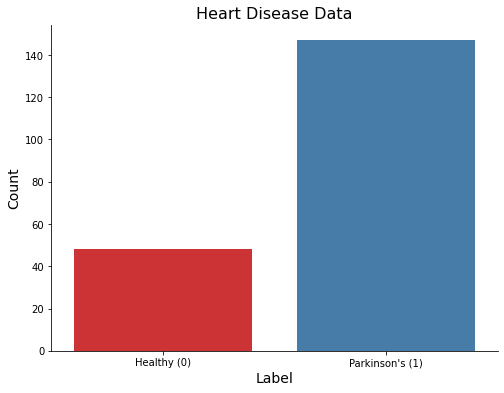

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['status'], palette="Set1")
plt.title("Heart Disease Data", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["Healthy (0)", "Parkinson's (1)"])  # Customizing x-axis labels
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Separating features and target

In [10]:
X = df.drop(columns=['status', 'name'], axis=1)
Y = df['status']

### Standardizing the features

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting Training and Testing Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.1)

In [13]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (175, 22)
X_test shape: (20, 22)
y_train shape: (175,)
y_test shape: (20,)


## Model Evaluation

### Logistic Regression

In [14]:
lr_model = LogisticRegression(max_iter=10, random_state=1)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10, random_state=1)

In [15]:
y_pred_test = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9


In [16]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.88      1.00      0.94        15

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20



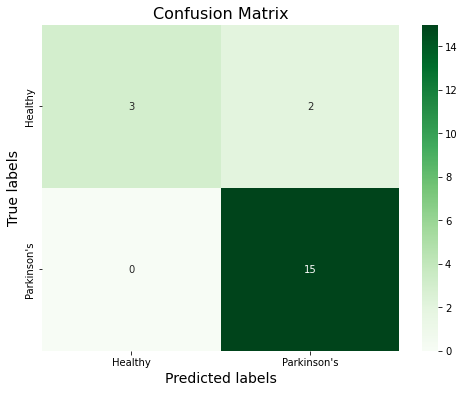

In [17]:
cm = confusion_matrix(y_test, y_pred_test)
class_names = ['Healthy', 'Parkinson\'s']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### SVM

In [18]:
svm_model = SVC(C=1.0, kernel='rbf', random_state=1)
svm_model.fit(X_train, y_train)

SVC(random_state=1)

In [19]:
y_pred_test = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9


In [20]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.88      1.00      0.94        15

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20



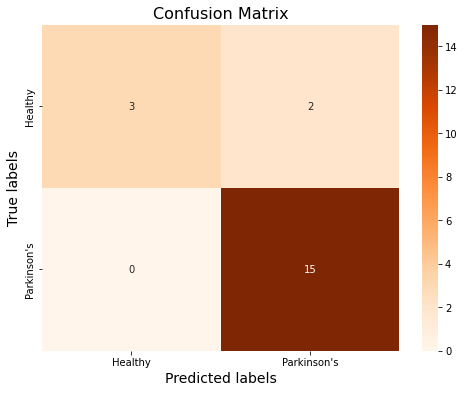

In [21]:
cm = confusion_matrix(y_test, y_pred_test)
class_names = ['Healthy', 'Parkinson\'s']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### Random Forest

In [22]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [23]:
y_pred_test = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.8


In [24]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.92      0.80      0.86        15

    accuracy                           0.80        20
   macro avg       0.75      0.80      0.76        20
weighted avg       0.84      0.80      0.81        20



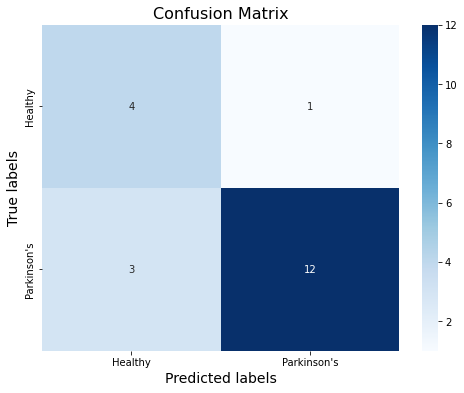

In [25]:
cm = confusion_matrix(y_test, y_pred_test)
class_names = ['Healthy', 'Parkinson\'s']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### Saving the Model

In [31]:
pickle.dump(svm_model, open('Parkinson\'s_Disease_Model.sav', 'wb'))

## Predictive System

In [30]:
# Taking user inputs
MDVPFo = float(input("Enter Average vocal fundamental frequency: "))
MDVPFhi = float(input("Enter Maximum vocal fundamental frequency: "))
MDVPFlo = float(input("Enter Minimum vocal fundamental frequency: "))
MDVPJitterPercent = float(input("Enter MDVP:Jitter(%) of fundamental frequency: "))
MDVPJitterAbs = float(input("Enter MDVP:Jitter(Abs) of fundamental frequency: "))
MDVPRAP = float(input("Enter MDVP:RAP of fundamental frequency: "))
MDVPPPQ = float(input("Enter MDVP:PPQ of fundamental frequency: "))
JitterDDP = float(input("Enter Jitter:DDP of fundamental frequency: "))
MDVPShimmer = float(input("Enter MDVP:Shimmer of amplitude: "))
MDVPShimmerDB = float(input("Enter MDVP:Shimmer(dB) of amplitude: "))
ShimmerAPQ3 = float(input("Enter Shimmer:APQ3 of amplitude: "))
ShimmerAPQ5 = float(input("Enter Shimmer:APQ5 of amplitude: "))
MDVPAPQ = float(input("Enter MDVP:APQ of amplitude: "))
ShimmerDDA = float(input("Enter Shimmer:DDA of amplitude: "))
NHR = float(input("Enter ratio of noise to tonal components (NHR): "))
HNR = float(input("Enter ratio of noise to tonal components (HNR): "))
RPDE = float(input("Enter nonlinear dynamical complexity measure (RPDE): "))
DFA = float(input("Enter Signal fractal scaling exponent: "))
spread1 = float(input("Enter nonlinear measures of fundamental frequency variation (spread1): "))
spread2 = float(input("Enter nonlinear measures of fundamental frequency variation (spread2): "))
D2 = float(input("Enter nonlinear dynamical complexity measure (D2): "))
PPE = float(input("Enter nonlinear measures of fundamental frequency variation (PPE): "))


# Converting the list in a DataFrame
features_df = pd.DataFrame({
    "MDVP:Fo(Hz)": [MDVPFo],
    "MDVP:Fhi(Hz)": [MDVPFhi],
    "MDVP:Flo(Hz)": [MDVPFlo],
    "MDVP:Jitter(%)": [MDVPJitterPercent],
    "MDVP:Jitter(Abs)": [MDVPJitterAbs],
    "MDVP:RAP": [MDVPRAP],
    "MDVP:PPQ": [MDVPPPQ],
    "Jitter:DDP": [JitterDDP],
    "MDVP:Shimmer": [MDVPShimmer],
    "MDVP:Shimmer(dB)": [MDVPShimmerDB],
    "Shimmer:APQ3": [ShimmerAPQ3],
    "Shimmer:APQ5": [ShimmerAPQ5],
    "MDVP:APQ": [MDVPAPQ],
    "Shimmer:DDA": [ShimmerDDA],
    "NHR": [NHR],
    "HNR": [HNR],
    "RPDE": [RPDE],
    "DFA": [DFA],
    "spread1": [spread1],
    "spread2": [spread2],
    "D2": [D2],
    "PPE": [PPE],
})

# Predicting parkinson's disease based on the features
prediction = svm_model.predict(features_df)

# Display the prediction
if prediction[0] == 0:
    print("\n\033[1mYou are Healthy")
else:
    print("\n\033[1mYou have Parkinson\'s Disease")

Enter Average vocal fundamental frequency: 119.992
Enter Maximum vocal fundamental frequency: 157.302
Enter Minimum vocal fundamental frequency: 74.997
Enter MDVP:Jitter(%) of fundamental frequency: 0.00784
Enter MDVP:Jitter(Abs) of fundamental frequency: 0.00007
Enter MDVP:RAP of fundamental frequency: 0.0037
Enter MDVP:PPQ of fundamental frequency: 0.00554
Enter Jitter:DDP of fundamental frequency: 0.01109
Enter MDVP:Shimmer of amplitude: 0.04374
Enter MDVP:Shimmer(dB) of amplitude: 0.426
Enter Shimmer:APQ3 of amplitude: 0.02182
Enter Shimmer:APQ5 of amplitude: 0.0313
Enter MDVP:APQ of amplitude: 0.02971
Enter Shimmer:DDA of amplitude: 0.06545
Enter ratio of noise to tonal components (NHR): 0.02211
Enter ratio of noise to tonal components (HNR): 21.033
Enter nonlinear dynamical complexity measure (RPDE): 0.414783
Enter Signal fractal scaling exponent: 0.815285
Enter nonlinear measures of fundamental frequency variation (spread1): -4.81303
Enter nonlinear measures of fundamental frequ